# Customer Segmentation and Market Basket Analysis

It is often cheaper to retain a customer than to acquire a new one.  One way to retain a customer is by giving a promotion such as discounts. However, if company offering discount to everyone then company will wasted money but if they don't do so, they will loss their customers. Thus a brilliant way to tackle this issue is by providing a customize promotion to each Customer Segmentation according to their needs. This techniques has been used by most big online company out there however, according to journal wrote by Young-Chan Lee from Dongkuk Universoty,small and medium sized enterprises(SMEs) companies are often ignored and are not well exposed to the benefits of using the technology.

Thus, objective of this notebook is to show the idea of behind it, its benefits and how can the system improve SMEs sales by using customers segmentation and market basket analysis.

The end product of this analysis.

1) A customer segmentation will be made to classfied them into several groups so that marketing strategies department can come out with a suitable promotion to retain and encourage customer to shop at their online platform. 

2) Market Basket Analysis (MBA) is an Association analysis technique used to find which products are generally bought together by customers. Thus, by knowing these items a recommendations systems can be made to recommend items to customer whenever they bought an item. It can also help the firm with developing or offering new products, or a bundle of products together as a combined offering. 

lets start!!


## Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_excel("online_retail_II.xlsx")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Take a quick look at the data structure

In [3]:
len(df)

525461

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
Invoice        525461 non-null object
StockCode      525461 non-null object
Description    522533 non-null object
Quantity       525461 non-null int64
InvoiceDate    525461 non-null datetime64[ns]
Price          525461 non-null float64
Customer ID    417534 non-null float64
Country        525461 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.nunique()

Invoice        28816
StockCode       4632
Description     4681
Quantity         825
InvoiceDate    25296
Price           1606
Customer ID     4383
Country           40
dtype: int64

## note

From these we can conclude that there is 4383 unique customers and that they have bought 4632 different products(stockcode). The total number of transactions carried out is of the order of  28,816.

In [6]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [7]:
df.isnull().sum(axis = 0)

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [8]:
print(df["InvoiceDate"].min())
print(df["InvoiceDate"].max())

2009-12-01 07:45:00
2010-12-09 20:01:00


### note summary

based on our early investigation, we found out:

    1) Missing value, for attribute Customer ID and Description. almost 20% from overall data point.
    2) Negative values for attiribute Price which is not make any sense for price to be negative values.
    3) date and time in same columns, maybe we can try to split it into 2 different column.

# Deep Exploration & Data cleaning and transformation

     1) Try to get a further insight on negative values of price, missing values
     2) split date and time
     3) a bit of EDA, 
         3.1) What is the peak hour for customer to shop
         3.2) Who is our valueable customers based on CustomersID
         3.3) Items that are hot in our list

In [9]:
#split the datetime into date and time
import datetime as dt
df['Dates'] = pd.to_datetime(df['InvoiceDate']).dt.date
df['Time'] = pd.to_datetime(df['InvoiceDate']).dt.time
df = df.drop(['InvoiceDate'],axis=1)
df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Dates,Time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01,07:45:00


In [10]:
#lets check rows that consist any null vallues
df[df.isnull().any(axis = 1)].head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Dates,Time
263,489464,21733,85123a mixed,-96,0.00,NaN,United Kingdom,2009-12-01,10:52:00
283,489463,71477,short,-240,0.00,NaN,United Kingdom,2009-12-01,10:52:00
284,489467,85123A,21733 mixed,-192,0.00,NaN,United Kingdom,2009-12-01,10:53:00
470,489521,21646,NaN,-50,0.00,NaN,United Kingdom,2009-12-01,11:44:00
577,489525,85226C,BLUE PULL BACK RACING CAR,1,0.55,NaN,United Kingdom,2009-12-01,11:49:00


### note 
most of the null values rows have negative "quantity" values and "price" is 0, some of them dont have any description on the items.

    1)early deduction is, these null values rows are customers who cancel their orders even before paying the bills

In [11]:
#further explorationon null values for "Customer ID"
df[df["Customer ID"].isnull()].head(10)

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Dates,Time
263,489464,21733,85123a mixed,-96,0.00,NaN,United Kingdom,2009-12-01,10:52:00
283,489463,71477,short,-240,0.00,NaN,United Kingdom,2009-12-01,10:52:00
284,489467,85123A,21733 mixed,-192,0.00,NaN,United Kingdom,2009-12-01,10:53:00
470,489521,21646,NaN,-50,0.00,NaN,United Kingdom,2009-12-01,11:44:00
577,489525,85226C,BLUE PULL BACK RACING CAR,1,0.55,NaN,United Kingdom,2009-12-01,11:49:00
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,0.85,NaN,United Kingdom,2009-12-01,11:49:00
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2.95,NaN,United Kingdom,2009-12-01,12:32:00
1056,489548,22254,FELT TOADSTOOL LARGE,12,1.25,NaN,United Kingdom,2009-12-01,12:32:00
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2.95,NaN,United Kingdom,2009-12-01,12:32:00
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,1.65,NaN,United Kingdom,2009-12-01,12:32:00


In [12]:
#further explorationon null values for "items description"
df[df.Description.isnull()].head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Dates,Time
470,489521,21646,NaN,-50,0.0,NaN,United Kingdom,2009-12-01,11:44:00
3114,489655,20683,NaN,-44,0.0,NaN,United Kingdom,2009-12-01,17:26:00
3161,489659,21350,NaN,230,0.0,NaN,United Kingdom,2009-12-01,17:39:00
3731,489781,84292,NaN,17,0.0,NaN,United Kingdom,2009-12-02,11:45:00
4296,489806,18010,NaN,-770,0.0,NaN,United Kingdom,2009-12-02,12:42:00


In [13]:
#further explorationon negative values for "price"
df[df["Price"]<0].head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Dates,Time
179403,A506401,B,Adjust bad debt,1,-53594.36,NaN,United Kingdom,2010-04-29,13:36:00
276274,A516228,B,Adjust bad debt,1,-44031.79,NaN,United Kingdom,2010-07-19,11:24:00
403472,A528059,B,Adjust bad debt,1,-38925.87,NaN,United Kingdom,2010-10-20,12:04:00


In [14]:
#customer who are likely canceling their orders
print(df[df["Price"]<=0 & df.Description.isnull() & df["Customer ID"].isnull()].head())
print("----------------")
print(len(df[df["Price"]<=0 & df.Description.isnull() & df["Customer ID"].isnull()]))

     Invoice StockCode   Description  Quantity  Price  Customer ID  \
263   489464     21733  85123a mixed       -96    0.0          NaN   
283   489463     71477         short      -240    0.0          NaN   
284   489467    85123A   21733 mixed      -192    0.0          NaN   
470   489521     21646           NaN       -50    0.0          NaN   
3114  489655     20683           NaN       -44    0.0          NaN   

             Country       Dates      Time  
263   United Kingdom  2009-12-01  10:52:00  
283   United Kingdom  2009-12-01  10:52:00  
284   United Kingdom  2009-12-01  10:53:00  
470   United Kingdom  2009-12-01  11:44:00  
3114  United Kingdom  2009-12-01  17:26:00  
----------------
3690


In [15]:
df['Quantity'].unique()

array([   12,    48,    24,    10,    18,     3,    16,     4,     2,
           6,     8,     1,    28,    30,    60,    32,    56,     9,
          25,    36,    20,   -12,    -6,    -4,   -24,    -3,    -2,
         576,   288,    27,   -96,    64,   160,  -240,  -192,     5,
          -1,    72,    50,    54,   -50,     7,   800,    11,    58,
         192,    96,   144,   100,   180,   216,    15,   240,    22,
         108,    33,    90,    81,   -81,   -48,    17,    -5,    14,
          13,    40,    -8,    -9,    21,   120,   -44,   230, -1043,
        -117,   200,   168,    19,   280,   128,  -150,   -18,   -23,
          80,   300,   450,    61,  -770,  -720,   480,    -7,    88,
          46,   -31,   -16,   954,  -954,  -200,   504,    45,   467,
       -1012,  4320,  5184,  4008,   -25,   600,   505,   500,    23,
          74,    47,   -89,   432,   252,    75,   184,  -600,  -504,
        -252,  -246,  -169,    31,    38,  -106,   -36,   360,   107,
          49,   -42,

## Summary:

As we can see, there are no records where quantity and price are negative, and there are about 3690 records where no records for description and price is 0. However, note that for all these records we do not have the customer ID. These records are likely customers who are canceling their orders. So we conclude that we can erase all records in that quantity or the price and negative. 

So lets clean a little bit before we analyze the data

In [16]:
#remove all rows that for Null Customer ID 
df = df[~(df["Customer ID"].isnull())]

# Remove negative or return transactions
df = df[~(df.Quantity<0)]
df = df[df.Price>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407664 entries, 0 to 525460
Data columns (total 9 columns):
Invoice        407664 non-null object
StockCode      407664 non-null object
Description    407664 non-null object
Quantity       407664 non-null int64
Price          407664 non-null float64
Customer ID    407664 non-null float64
Country        407664 non-null object
Dates          407664 non-null object
Time           407664 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 31.1+ MB


In [17]:
#save to csv so that we can import the data to tableau for visualization
df.to_csv("clean_online_retail.csv")

## Data Insights

    I used Tableau for visualization as I think it is enough for me to get the general insight of our dataset. Reduce the time taken for me to write the code, just drag and click. 

<img src='maps.png' style="width:800px;height:600px"/>

<img src='peak hours.png' style="width:800px;height:600px"/>

<img src='peak times.png' style="width:800px;height:600px"/>

<img src='Customers.png' style="width:800px;height:600px"/>

<img src='hot items.png' style="width:800px;height:600px"/>

Summary:

    1. Peak hours for our customers to shop is at 12 pm, peak months is November
    2. hot items was wooden frame antique
    3. Our most valuable or VIP customers is Customer with ID of 14911
    4. UK is the country where most of the transaction took place.

## Market Basket Analysis (MBA) 

Association analysis technique used to find which products are generally bought together by customers. Thus, by knowing these items a recommendations systems can be made to recommend items to customer whenever they bought an item. Lets do it by dividing it into several basket based on country.

In [18]:
#to encode the unit so that we have only binary values 1 or 0.
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [19]:
def create_basket(country_filter):
    basket = (df[df['Country'] == country_filter]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))
    return basket

## Basket for French Customers

In [20]:
#basket for customers in France 
country_filter = "France"
basket_french = create_basket("France")
basket_sets = basket_french.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.head()

Description,FLAMINGO LIGHTS,LARGE SKULL WINDMILL,RED/WHITE DOT MINI CASES,SET 2 TEA TOWELS I LOVE LONDON,VINTAGE DESIGN GIFT TAGS,10 COLOUR SPACEBOY PEN,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,...,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP SUKI AND FRIENDS,WRAP WINTER FOREST,"WRAP, CAROUSEL",YELLOW BREAKFAST CUP AND SAUCER,YELLOW RED FLOWER PIGGY BANK,YOU'RE CONFUSING ME METAL SIGN,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489439,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
489883,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490152,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.072034,( RED/WHITE DOT MINI CASES)
1,0.055085,(4 TRADITIONAL SPINNING TOPS)
2,0.063559,(ASSORTED COLOUR BIRD ORNAMENT)
3,0.118644,(ASSORTED COLOUR MINI CASES)
4,0.093220,(BAKING SET 9 PIECE RETROSPOT )
...,...,...
162,0.050847,"(LUNCH BOX WITH CUTLERY RETROSPOT , ROUND SNAC..."
163,0.050847,"(ROUND SNACK BOXES SET OF4 WOODLAND , LUNCH BO..."
164,0.055085,"(PLASTERS IN TIN CIRCUS PARADE , PLASTERS IN T..."
165,0.063559,"(PLASTERS IN TIN CIRCUS PARADE , PLASTERS IN T..."


In [22]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BLUE SPOTTY CUP),(PINK SPOTTY CUP),0.059322,0.067797,0.050847,0.857143,12.642857,0.046826,6.525424
1,(PINK SPOTTY CUP),(BLUE SPOTTY CUP),0.067797,0.059322,0.050847,0.750000,12.642857,0.046826,3.762712
2,(CIRCUS PARADE LUNCH BOX ),(LUNCH BOX I LOVE LONDON),0.118644,0.097458,0.059322,0.500000,5.130435,0.047759,1.805085
3,(LUNCH BOX I LOVE LONDON),(CIRCUS PARADE LUNCH BOX ),0.097458,0.118644,0.059322,0.608696,5.130435,0.047759,2.252354
4,(CIRCUS PARADE LUNCH BOX ),(LUNCH BOX WITH CUTLERY RETROSPOT ),0.118644,0.177966,0.059322,0.500000,2.809524,0.038207,1.644068
5,(LUNCH BOX WITH CUTLERY RETROSPOT ),(CIRCUS PARADE LUNCH BOX ),0.177966,0.118644,0.059322,0.333333,2.809524,0.038207,1.322034
6,(CIRCUS PARADE LUNCH BOX ),(PLASTERS IN TIN CIRCUS PARADE ),0.118644,0.165254,0.072034,0.607143,3.673993,0.052427,2.124807
7,(PLASTERS IN TIN CIRCUS PARADE ),(CIRCUS PARADE LUNCH BOX ),0.165254,0.118644,0.072034,0.435897,3.673993,0.052427,1.562404
8,(CIRCUS PARADE LUNCH BOX ),(PLASTERS IN TIN WOODLAND ANIMALS),0.118644,0.139831,0.050847,0.428571,3.064935,0.034257,1.505297
9,(PLASTERS IN TIN WOODLAND ANIMALS),(CIRCUS PARADE LUNCH BOX ),0.139831,0.118644,0.050847,0.363636,3.064935,0.034257,1.384988


## UK

In [23]:
#basket for customers in UK
basket_uk = create_basket("United Kingdom")
basket_sets = basket_uk.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.head()

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.032932,(6 RIBBONS RUSTIC CHARM)
1,0.058029,(60 TEATIME FAIRY CAKE CASES)
2,0.035771,(72 SWEETHEART FAIRY CAKE CASES)
3,0.037134,(ANTIQUE SILVER TEA GLASS ETCHED)
4,0.071542,(ASSORTED COLOUR BIRD ORNAMENT)
...,...,...
72,0.045026,(WOODEN PICTURE FRAME WHITE FINISH)
73,0.043152,(ZINC METAL HEART DECORATION)
74,0.039178,"(RED HANGING HEART T-LIGHT HOLDER, WHITE HANGI..."
75,0.033102,"(STRAWBERRY CERAMIC TRINKET BOX, SWEETHEART CE..."


In [38]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.053713,0.165796,0.039178,0.729387,4.399302,0.030272,3.082644
1,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.165796,0.053713,0.039178,0.236301,4.399302,0.030272,1.239084
2,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.070293,0.043380,0.033102,0.470921,10.855835,0.030053,1.808086
3,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.043380,0.070293,0.033102,0.763089,10.855835,0.030053,3.924288
4,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.045026,0.055644,0.030831,0.684741,12.305783,0.028326,2.995498
5,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.055644,0.045026,0.030831,0.554082,12.305783,0.028326,2.141589


## Summary

We can conclude that if you a producer of certain product, it is better for you to make it in several colour/pattern as customer tends to buy more/ buy for each color/pattern. Example: lets say if you make ceramic cup, but you produce it only in black color, chance of customer to buy more that one cup is lower compare to if you produce it in black and blue color. Data shows that customer will buy more than one cup in one transaction if there is more choice of color or pattern.



# Customer Segmentation:

To put it short Customer Segmentation allowed us to:

Understand the Customers -> Target Marketing -> Higher Revenue.

### Methodology 
1) CLUSTERING
The most obvious method to perform customer segmentation is using unsupervised Machine Learning methods like clustering. The method is as simple as collecting as much data about the customers as possible in the form of features or attributes and then finding out the different clusters that can be obtained from that data. Finally, we can find traits of customer segments by analyzing the characteristics of the clusters.

2) Exploratory Data Analysis:

Using exploratory data analysis is another way of finding out customer segments. This is usually done by analysts who have a good knowledge about the domain relevant to both products and customers. It can be done flexibly to include the top decision points in an analysis.

3) RFM Model for Customer Value:

Since our dataset is limited to the sales records, and didn´t include anothers information about our customers, we will use a RFM,*Recency, Frequency and Monetary Value, based model of customer value for finding our customer segments. The RFM model will take the transactions of a customer and calculate three important informational attributes about each customer:

    Recency: The value of how recently a customer purchased at the establishment
    Frequency: How frequent the customer’s transactions are at the establishment
    Monetary value: The dollar (or pounds in our case) value of all the transactions that the customer made at the establishment

In [43]:
#checking the most recent transaction by the customers
df.Dates.max()

datetime.date(2010, 12, 9)

In [49]:
df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Dates,Time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01,07:45:00


In [47]:
#set the latest date to most recent date of transaction made by the customers
now = dt.date(2010,12,9)

2010-12-09


In [51]:
#group by customers and check last date of purshace
recency_df = df.groupby(by='Customer ID', as_index=False)['Dates'].max()
recency_df.columns = ['Customer ID','LastPurshaceDate']
recency_df.head()

,Customer ID,LastPurshaceDate
0,12346.0,2010-06-28
1,12347.0,2010-12-07
2,12348.0,2010-09-27
3,12349.0,2010-10-28
4,12351.0,2010-11-29


In [52]:
#calculate recency by substracting current time "now" with last purchase
#highest values of recency = customer are rarely shop in our shop 
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)
recency_df.head()

,Customer ID,LastPurshaceDate,Recency
0,12346.0,2010-06-28,164
1,12347.0,2010-12-07,2
2,12348.0,2010-09-27,73
3,12349.0,2010-10-28,42
4,12351.0,2010-11-29,10


In [55]:
frequency_df = df
frequency_df.drop_duplicates(subset=['Invoice', 'Customer ID'], keep="first", inplace=True)
frequency_df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Dates,Time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
8,489435,22350,CAT BOWL,12,2.55,13085.0,United Kingdom,2009-12-01,07:46:00
12,489436,48173C,DOOR MAT BLACK FLOCK,10,5.95,13078.0,United Kingdom,2009-12-01,09:06:00
31,489437,22143,CHRISTMAS CRAFT HEART DECORATIONS,6,2.10,15362.0,United Kingdom,2009-12-01,09:08:00
54,489438,21329,DINOSAURS WRITING SET,28,0.98,18102.0,United Kingdom,2009-12-01,09:24:00


In [57]:
#calculate how frequent of customer by product using our online platform
# higher frequency = regular customer
frequency_df = df.groupby(by = "Customer ID", as_index = False)["Invoice"].count()
frequency_df.columns = ['Customer ID','frequency']
frequency_df.head()

,Customer ID,frequency
0,12346.0,11
1,12347.0,2
2,12348.0,1
3,12349.0,3
4,12351.0,1


In [60]:
#create column total cost
df['TotalCost'] = df['Quantity'] * df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Dates,Time,TotalCost
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,07:45:00,83.40
8,489435,22350,CAT BOWL,12,2.55,13085.0,United Kingdom,2009-12-01,07:46:00,30.60
12,489436,48173C,DOOR MAT BLACK FLOCK,10,5.95,13078.0,United Kingdom,2009-12-01,09:06:00,59.50
31,489437,22143,CHRISTMAS CRAFT HEART DECORATIONS,6,2.10,15362.0,United Kingdom,2009-12-01,09:08:00,12.60
54,489438,21329,DINOSAURS WRITING SET,28,0.98,18102.0,United Kingdom,2009-12-01,09:24:00,27.44


In [61]:
monetary_df = df.groupby(by='Customer ID',as_index=False).agg({'TotalCost': 'sum'})
monetary_df.columns = ['Customer ID','Monetary']
monetary_df.head()

,Customer ID,Monetary
0,12346.0,214.24
1,12347.0,42.90
2,12348.0,13.20
3,12349.0,237.65
4,12351.0,10.50


## rfm dataframe

In [63]:
#make a new rfm dataframe.
rf_df = recency_df.merge(frequency_df,on='Customer ID')
rf_df.head()

,Customer ID,LastPurshaceDate,Recency,frequency
0,12346.0,2010-06-28,164,11
1,12347.0,2010-12-07,2,2
2,12348.0,2010-09-27,73,1
3,12349.0,2010-10-28,42,3
4,12351.0,2010-11-29,10,1


In [64]:
rfm_df = rf_df.merge(monetary_df,on = "Customer ID")
rfm_df.head()

,Customer ID,LastPurshaceDate,Recency,frequency,Monetary
0,12346.0,2010-06-28,164,11,214.24
1,12347.0,2010-12-07,2,2,42.90
2,12348.0,2010-09-27,73,1,13.20
3,12349.0,2010-10-28,42,3,237.65
4,12351.0,2010-11-29,10,1,10.50


In [68]:
rfm_df.drop('LastPurshaceDate',axis=1,inplace=True)
rfm_df.head()

,Customer ID,Recency,frequency,Monetary
0,12346.0,164,11,214.24
1,12347.0,2,2,42.90
2,12348.0,73,1,13.20
3,12349.0,42,3,237.65
4,12351.0,10,1,10.50


In [69]:
rfm_df.describe()

,Customer ID,Recency,frequency,Monetary
count,4312.000000,4312.000000,4312.000000,4312.000000
mean,15349.290353,90.172542,4.455705,249.258683
std,1701.200176,96.861457,8.170213,1541.674728
min,12346.000000,0.000000,1.000000,0.001000
25%,13882.500000,17.000000,1.000000,17.700000
50%,15350.500000,52.000000,2.000000,48.100000
75%,16834.250000,135.000000,5.000000,132.670000
max,18287.000000,373.000000,205.000000,54490.920000


## Inspection on rfm dataframe and transformation

    check the skewness and kurtosis values of the each attribute
    scaling and transformation

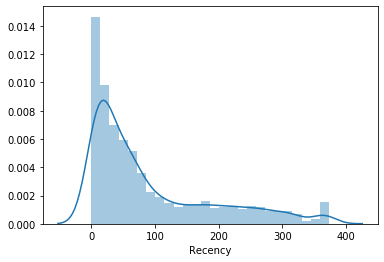

In [91]:

sns.distplot(rfm_df.Recency)

In [90]:
kurtosis = rfm_df.Recency.kurt()
print ("Skewness:", skewness,"Kurtosis:", kurtosis)

Skewness: 1.2829044790811643 Kurtosis: 0.6041581127499609


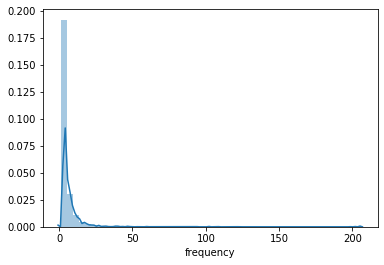

In [92]:
sns.distplot(rfm_df.frequency)

In [95]:
skewness_frequency = rfm_df.frequency.skew()
kurtosis_frequency = rfm_df.frequency.kurt()
print ("Skewness:", skewness_frequency,"Kurtosis:", kurtosis_frequency)

Skewness: 10.54682052708063 Kurtosis: 172.90026714233196


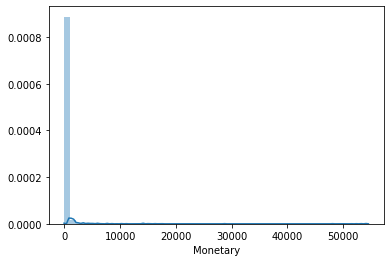

In [96]:
sns.distplot(rfm_df.Monetary)

In [97]:
skewness_monetary = rfm_df.Monetary.skew()
kurtosis_monetary = rfm_df.Monetary.kurt()
print ("Skewness:", skewness_monetary,"Kurtosis:", kurtosis_monetary)

Skewness: 22.022040342430202 Kurtosis: 634.0242225764925


In [128]:
#log transformation
rfm_df['recency_log'] = np.log(rfm_df.Recency + 1)
rfm_df['frequency_log'] = np.log(rfm_df.frequency + 1)
rfm_df['Monetary_log'] = np.log(rfm_df.Monetary + 1)
rfm_df=rfm_df.drop(["amount_log"],axis=1)
rfm_df.head()

,Customer ID,Recency,frequency,Monetary,frequency_log,recency_log,Monetary_log
0,12346.0,164,11,214.24,2.484907,5.105945,5.371754
1,12347.0,2,2,42.90,1.098612,1.098612,3.781914
2,12348.0,73,1,13.20,0.693147,4.304065,2.653242
3,12349.0,42,3,237.65,1.386294,3.761200,5.474998
4,12351.0,10,1,10.50,0.693147,2.397895,2.442347


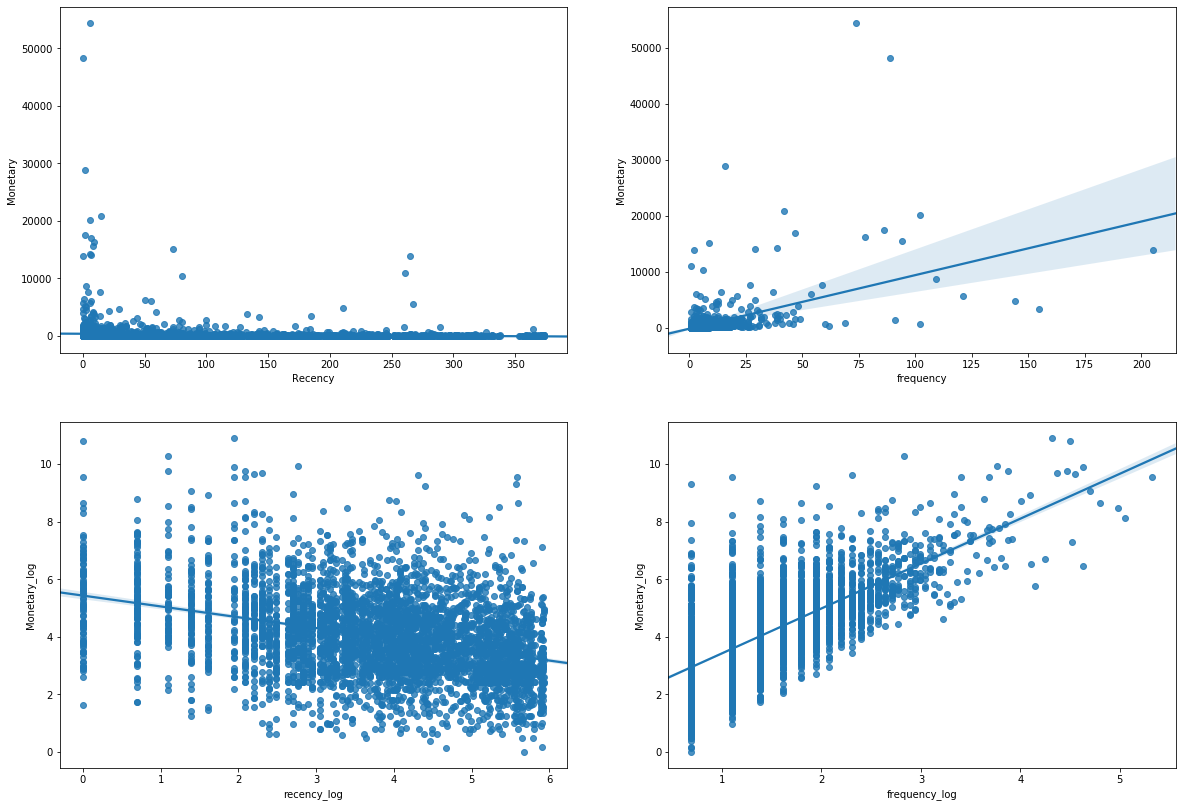

In [112]:
fig = plt.figure(figsize=(20,14))
f1 = fig.add_subplot(221); sns.regplot(x='Recency', y='Monetary', data=rfm_df)
f1 = fig.add_subplot(222); sns.regplot(x='frequency', y='Monetary', data=rfm_df)
f1 = fig.add_subplot(223); sns.regplot(x='recency_log', y='Monetary_log', data=rfm_df)
f1 = fig.add_subplot(224); sns.regplot(x='frequency_log', y='Monetary_log', data=rfm_df)

## kmeans

In [150]:
from sklearn import preprocessing
import math

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [132]:
rfm_df_selected = rfm_df.iloc[:,4:7]
rfm_df_selected.head()

,frequency_log,recency_log,Monetary_log
0,2.484907,5.105945,5.371754
1,1.098612,1.098612,3.781914
2,0.693147,4.304065,2.653242
3,1.386294,3.761200,5.474998
4,0.693147,2.397895,2.442347


In [151]:
X_subset = rfm_df_selected
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
X_scaled

array([[ 1.61301719,  0.9425402 ,  0.93660145],
       [-0.39469275, -1.94093163, -0.1521835 ],
       [-0.98191026,  0.36554813, -0.92514301],
       ...,
       [-0.98191026,  1.36305459, -0.39267049],
       [-0.39469275,  0.66375346, -0.28805251],
       [ 0.34511382, -0.65167323,  0.27067821]])

In [160]:
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit(X_scaled)

In [161]:
y_km.cluster_centers_

array([[ 0.35379213,  0.24427467,  0.60669889],
       [ 1.66587873, -1.33391361,  1.30888507],
       [-0.33559171, -0.73783151, -0.45775293],
       [-0.80054619,  0.85042338, -0.77063818]])

In [162]:
y_km.labels_

array([0, 2, 3, ..., 3, 3, 0], dtype=int32)

In [163]:
labels = y_km.labels_

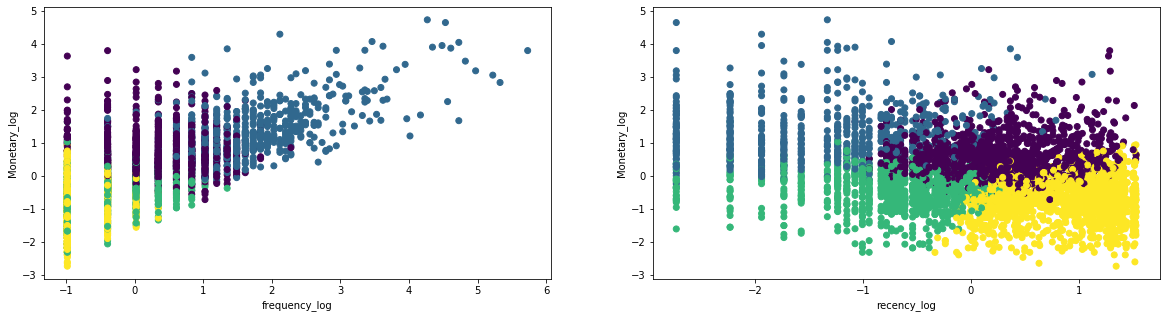

In [164]:
# And we'll visualize it:
#plt.scatter(X_scaled[:,0], X_scaled[:,1], c=model.labels_.astype(float))
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = X_scaled[:,0], y = X_scaled[:,2], c=y_km.labels_.astype(float))
ax.set_xlabel(feature_vector[0])
ax.set_ylabel(feature_vector[2])
ax = fig.add_subplot(122)
plt.scatter(x = X_scaled[:,1], y = X_scaled[:,2], c=y_km.labels_.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[2])

plt.show()

## note

We can see that there is a clear group/segmentation in our recency vs monetary graph above but not in the case of frequency vs monetary. 

The best choice may lie on the option that gives us a simpler business explanation and at the same time target customers in focus groups with sizes closer to the desired.

In [159]:
#calculate silhouette_score
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(X_scaled)
    clusters = kmeans.predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.40866588017503297
For n_clusters = 3 The average silhouette_score is : 0.31420601555260597
For n_clusters = 4 The average silhouette_score is : 0.3159398838392828
For n_clusters = 5 The average silhouette_score is : 0.29641056138819527
For n_clusters = 6 The average silhouette_score is : 0.28939582567927963
For n_clusters = 7 The average silhouette_score is : 0.28667413299476485
For n_clusters = 8 The average silhouette_score is : 0.2789975661596928
For n_clusters = 9 The average silhouette_score is : 0.2800576284004511


In [165]:
rfm_df['clusters_3'] = labels 
rfm_df.head()

,Customer ID,Recency,frequency,Monetary,frequency_log,recency_log,Monetary_log,clusters_3
0,12346.0,164,11,214.24,2.484907,5.105945,5.371754,0
1,12347.0,2,2,42.90,1.098612,1.098612,3.781914,2
2,12348.0,73,1,13.20,0.693147,4.304065,2.653242,3
3,12349.0,42,3,237.65,1.386294,3.761200,5.474998,0
4,12351.0,10,1,10.50,0.693147,2.397895,2.442347,2


## Deep exploration on each group 

In [166]:
#group 3
subset_df_3 = rfm_df[rfm_df["clusters_3"]==3]
subset_df_3.head()

,Customer ID,Recency,frequency,Monetary,frequency_log,recency_log,Monetary_log,clusters_3
2,12348.0,73,1,13.20,0.693147,4.304065,2.653242,3
6,12353.0,43,1,7.80,0.693147,3.784190,2.174752,3
7,12355.0,202,1,30.00,0.693147,5.313206,3.433987,3
14,12362.0,373,1,130.00,0.693147,5.924256,4.875197,3
15,12366.0,268,1,162.24,0.693147,5.594711,5.095222,3


In [167]:
subset_df_3.describe()

,Customer ID,Recency,frequency,Monetary,frequency_log,recency_log,Monetary_log,clusters_3
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.0
mean,15350.995343,175.744511,1.326680,24.178184,0.818921,4.980430,2.881075,3.0
std,1704.129317,100.525874,0.580761,24.058319,0.215324,0.659010,0.856380,0.0
min,12348.000000,27.000000,1.000000,0.001000,0.693147,3.332205,0.001000,3.0
25%,13843.500000,78.000000,1.000000,10.200000,0.693147,4.369448,2.415914,3.0
50%,15337.000000,169.000000,1.000000,17.700000,0.693147,5.135798,2.928524,3.0
75%,16839.000000,258.000000,2.000000,30.000000,1.098612,5.556828,3.433987,3.0
max,18286.000000,373.000000,4.000000,214.800000,1.609438,5.924256,5.374352,3.0


In [168]:
#group 2
subset_df_2 = rfm_df[rfm_df["clusters_3"]==2]
subset_df_2.describe()

,Customer ID,Recency,frequency,Monetary,frequency_log,recency_log,Monetary_log,clusters_3
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.0
mean,15490.589041,20.200211,2.336143,36.572771,1.138697,2.774021,3.334096,2.0
std,1713.884080,13.470783,1.263647,33.587648,0.359520,0.869008,0.804773,0.0
min,12347.000000,0.000000,1.000000,0.850000,0.693147,0.000000,0.615186,2.0
25%,14065.000000,10.000000,1.000000,15.900000,0.693147,2.397895,2.827314,2.0
50%,15579.000000,17.000000,2.000000,29.850000,1.098612,2.890372,3.429137,2.0
75%,16988.000000,29.000000,3.000000,47.700000,1.386294,3.401197,3.885679,2.0
max,18283.000000,63.000000,9.000000,590.000000,2.302585,4.158883,6.381816,2.0


In [169]:
#group 1
subset_df_1 = rfm_df[rfm_df["clusters_3"]==1]
subset_df_1.describe()

,Customer ID,Recency,frequency,Monetary,frequency_log,recency_log,Monetary_log,clusters_3
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.0
mean,15365.208841,11.140244,14.725610,1093.642271,2.521901,1.939899,5.915389,1.0
std,1698.171916,16.007398,17.114193,3738.598373,0.588866,1.090155,1.180417,0.0
min,12415.000000,0.000000,2.000000,37.190000,1.098612,0.000000,3.642574,1.0
25%,13924.500000,2.000000,7.000000,161.712500,2.079442,1.098612,5.091985,1.0
50%,15381.000000,7.000000,10.000000,295.095000,2.397895,2.079442,5.690604,1.0
75%,16814.750000,14.000000,15.000000,696.450000,2.772589,2.708050,6.547418,1.0
max,18260.000000,211.000000,205.000000,54490.920000,5.327876,5.356586,10.905808,1.0


## Summary

    1) Group 1 is a group of customer that spend the most (highest mean value for Monetary), frequently used our online platform to shop and low recency mean value. (Loyal, regular and vvip customer)
    
    2) Group 2 is a group of customer who have a bit higher recency compare to group 1, mean frequency is 2.3, used our platform at least 2 times to shop and spend a resonable amount of money. (new customer, start to build trust using our online platform.)
    
    3) Group 3 is a group of customer who have the highest recency and lowest frequency. They are one time customer. (may shop because of rare product/extra ordinary offers that they will not get from other suppliers). 
    